### Clouds : test clouds 3D with NEXT MC events

G. Díaz, J. A Hernando


May 2021

In [1]:
#%matplotlib inline 

%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
#import hipy.hfit         as hfit

import clouds.clouds    as clouds
import clouds.pltclouds as pltclouds

#import bes.bes           as bes
#import bes.clouds        as clouds
#import next.reco.chits      as chits
#import next.reco.display    as nplay


In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Wed May  5 11:46:21 2021


In [5]:
#import os
import re
import glob
#import numpy  as np
#import pandas as pd
#import tables as tb

#import matplotlib
#from matplotlib import cm
#from matplotlib import pyplot as plt

#import clouds
#import pltclouds

In [6]:
get_file_number = lambda filename: int(re.findall("_[0-9]+_", filename)[0][1:-1])

def split_hits(hitsdf, weight="E"):
    
    xyz = hitsdf[["X", "Y", "Z"]].values
    x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]
    w = hitsdf[weight].values
    
    return x, y, z, w

# ojo
#fname = '/home/hernando/data/NEW/MC/bb0nu_esmeralda/map_8264.h5'
fname = '/Users/hernando/investigacion/NEXT/data/MC/NEW/bb0nu_esmeralda/map_8264.h5'
maps_te = pd.read_hdf(fname, "time_evolution")
dv = maps_te.dv.mean()

In [75]:
#datadir   = "/home/hernando/data/NEW/MC/bb0nu_esmeralda/"
datadir   = "/Users/hernando/investigacion/NEXT/data/MC/NEW/bb0nu_esmeralda/"
files     = glob.glob(datadir + '*.h5')
def file_number(file):
    fname = file .split('/')[-1]
    ifile = fname.split('_')[1]
    return str(ifile)
#print(files)
filenames = sorted(files, key = file_number)
print('total files', len(filenames))

total files 501


In [76]:
#filename = np.random.choice(filenames)
#print(filename)
#filename = '/home/hernando/data/NEW/MC/bb0nu_esmeralda/esmeralda_321_0nubb.h5'
#print("File number", get_file_number(filename))

In [503]:
# events good:  3214
# File number 125 , Event 1252
# filename, event  =  360 ,  3604
# filename, event  =  379 ,  3798

# interesing problematic events
# filename, event  =  190 ,  1902


In [504]:
israndom = True
filename = np.random.choice(filenames) if israndom else filename

CHITS_lowTh  = pd.read_hdf(filename, "/CHITS/lowTh") .groupby("event")
CHITS_highTh = pd.read_hdf(filename, "/CHITS/highTh").groupby("event")

MChits = pd.read_hdf(filename, "MC/hits").groupby("event_id")
data_events = pd.read_hdf(filename, "Run/events")
event       = np.random.choice(data_events["evt_number"]) if israndom else event
print('filename, event  = ', get_file_number(filename), ', ', event)

filename, event  =  75 ,  750


In [505]:
low  = CHITS_lowTh .get_group(event)
high = CHITS_highTh.get_group(event)
true = MChits      .get_group(event)

x, y, z, w = split_hits(low, weight="E")
coors = (x, y, z)
ene   = 1e-5 * w
steps = (10., 10., 2.)

xmc, ymc, zmc = true["x"].values, true["y"].values, dv*true["z"].values
enemc, timemc = true["energy"].values, true['time'].values
coorsmc = (xmc, ymc, zmc)

print('Energy MC ', np.sum(enemc), ', RC ', np.sum(ene))

Energy MC  2.197394 , RC  2.0211127998125553


## Draw MC event

<IPython.core.display.Javascript object>


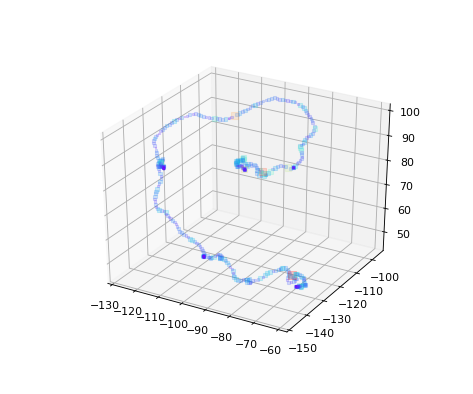

In [506]:
subplot = pltext.canvas(1, 1)
plt.gcf().add_subplot(1, 1 ,1, projection = '3d')
scalemc = enemc/np.max(enemc)
plt.gca().scatter(xmc, ymc, zmc, c = scalemc , s = 50 * scalemc, marker = 's', alpha = 0.2);

<IPython.core.display.Javascript object>


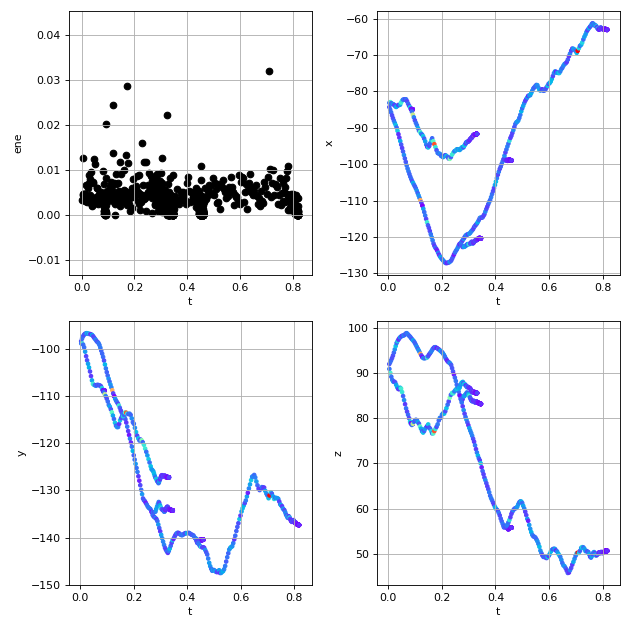

In [507]:
pltclouds.plot_tview(coorsmc, enemc, timemc)

## Draw Reco

<IPython.core.display.Javascript object>


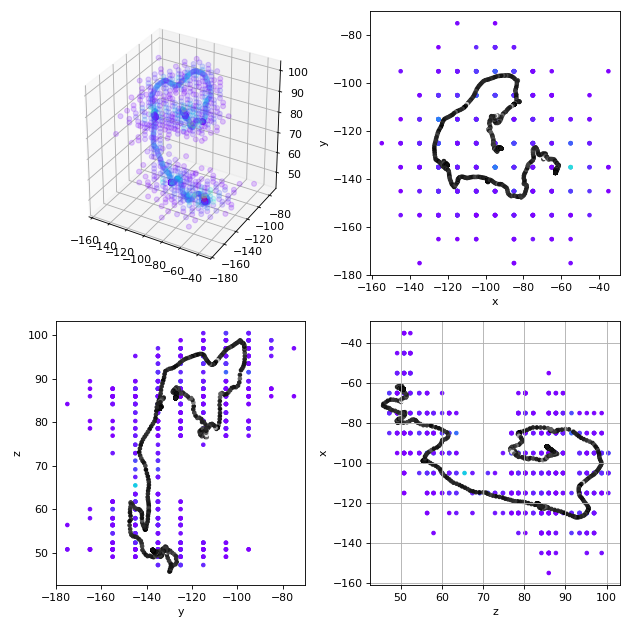

In [508]:
pltclouds.plot_xyview(coors, ene, coorsmc, enemc)

## Clouds 

In [527]:
cut   = -0.1
steps = (10., 10., 4.)
bins, mask, cells, df = clouds.clouds(coors, steps, ene, cut)
cenemc = clouds.cells_value(bins, mask, coorsmc, enemc)
df['mcene']  = cenemc
df['istrue'] = cenemc > 0

In [528]:
#df

In [529]:
xana = clouds.analysis(df)
print(xana)

{'eeisnodesuccess': 6, 'eeisnodefailures': 2, 'eeisnodeeff': 0.75, 'eeisbordersuccess': 30, 'eeisborderfailures': 208, 'eeisbordereff': 0.12605042016806722, 'eeispasssuccess': 9, 'eeispassfailures': 9, 'eeispasseff': 0.5, 'eeisridgesuccess': 16, 'eeisridgefailures': 11, 'eeisridgeeff': 0.5925925925925926, 'eiscoresuccess': 48, 'eiscorefailures': 334, 'eiscoreeff': 0.1256544502617801}


<IPython.core.display.Javascript object>


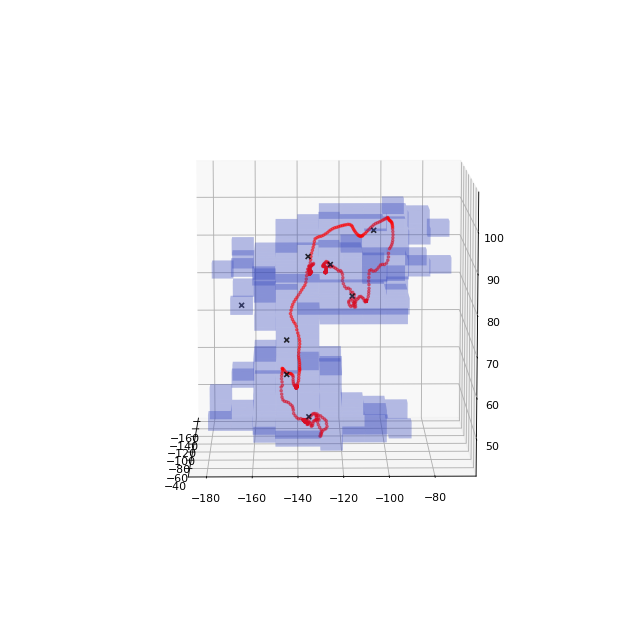

In [541]:
plt.figure(figsize = (8, 8));
#draw = pltclouds.drawer(cells, bins, df)
draw = pltclouds.drawer(cells, bins, df, 'e')
plt.gca().scatter(xmc, ymc, zmc, c = 'red' , marker = '.', alpha = 0.5);
#pltclouds.rotate()
opts = {'ispass': {'marker':'d', 'c':'black'}}
draw(iscore = True, ridge = False, cloud = False, link = False, ispass = False, rotate = False, opts = opts)
#pltclouds.rotate();

In [465]:
def plot_analysis(df, name = 'e'):
    
    ene  = df.evalue.values
    lap  = df.pvalue.values
    
    true = df.istrue.values
    cells_types = (name + 'isnode', name +'isborder',
                   name + 'ispass', name +'isridge', 'iscore')
    
    subplot = pltext.canvas(2 * len(cells_types), 2, 4, 4)
    
    dat = {}
    for i, itype in enumerate(cells_types):
        vals  = df[itype].values  
        ntot  = np.sum(vals)
        yes   = vals & true
        noes  = vals & (~true)
        nyes  = np.sum(yes)
        nnoes = np.sum(noes)
        eff   = float(nyes/ntot) if ntot >0 else -1
        dat[name+itype+'success']  = nyes
        dat[name+itype+'failures'] = nnoes
        dat[name+itype+'eff']      = eff
        subplot(2 * i + 1)
        pltext.hist(ene[yes ], 50)
        pltext.hist(ene[noes], 50)
        plt.xlabel('ene')
        plt.title(itype)
        subplot(2 * i + 2)
        pltext.hist(lap[yes ], 50)
        pltext.hist(lap[noes], 50)
        plt.xlabel('lap')
        plt.title(itype)
        
    plt.tight_layout()
    

<IPython.core.display.Javascript object>


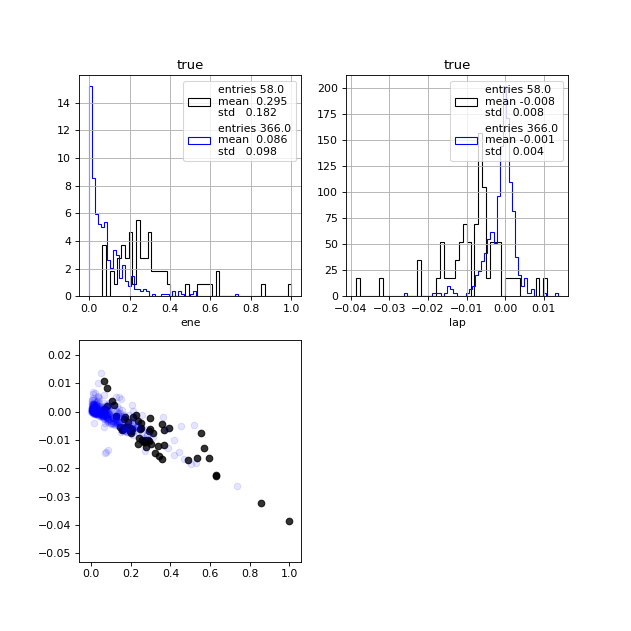

In [466]:
xene   = df.evalue.values
lap    = df.pvalue.values
istrue = df.istrue.values
subplot = pltext.canvas(4, 2, 4, 4)
subplot(1)
pltext.hist(xene[istrue] , 50, density = True)
pltext.hist(xene[~istrue], 50, density = True)
plt.xlabel('ene'); plt.title('true')
subplot(2)
pltext.hist(lap[istrue] , 50, density = True)
pltext.hist(lap[~istrue], 50, density = True)
plt.xlabel('lap'); plt.title('true')
subplot(3)
plt.scatter(xene[istrue] , lap[istrue] , alpha =.8)
plt.scatter(xene[~istrue], lap[~istrue], alpha =.1)

<IPython.core.display.Javascript object>


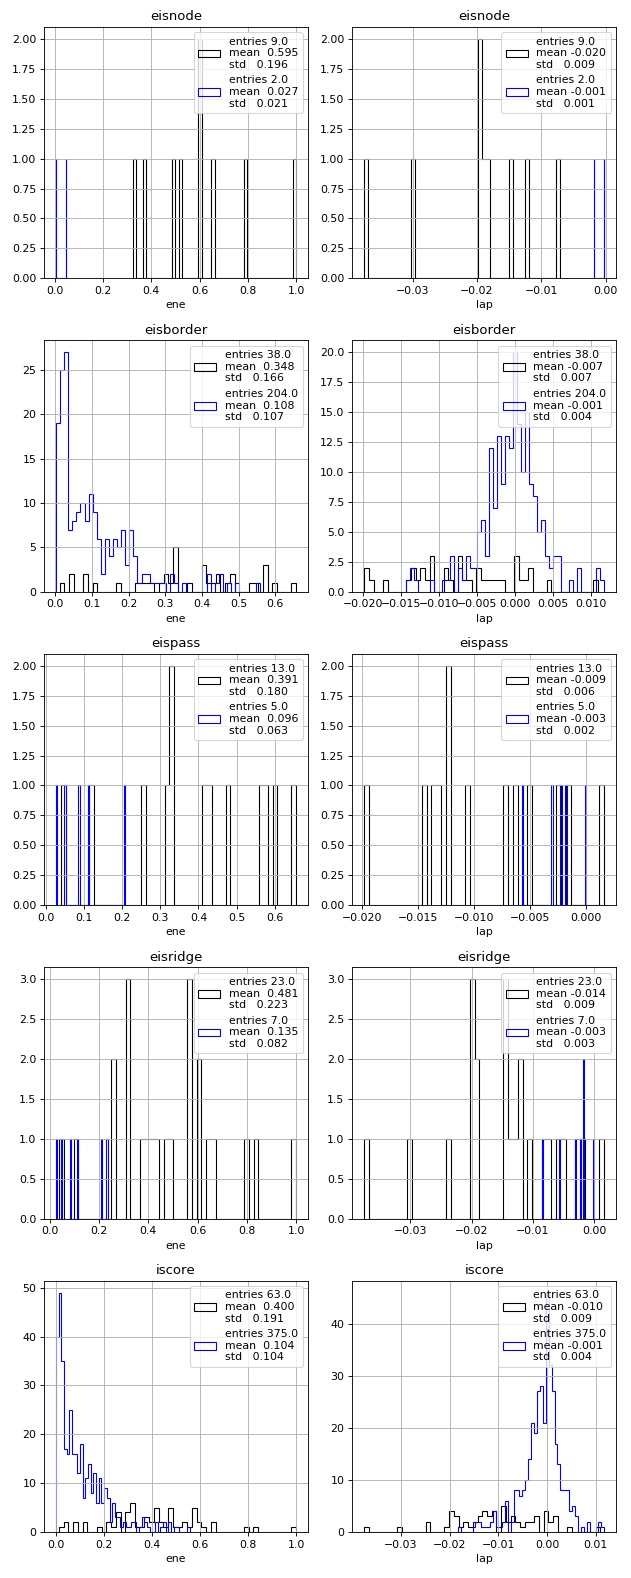

In [412]:
plot_analysis(df)

<IPython.core.display.Javascript object>


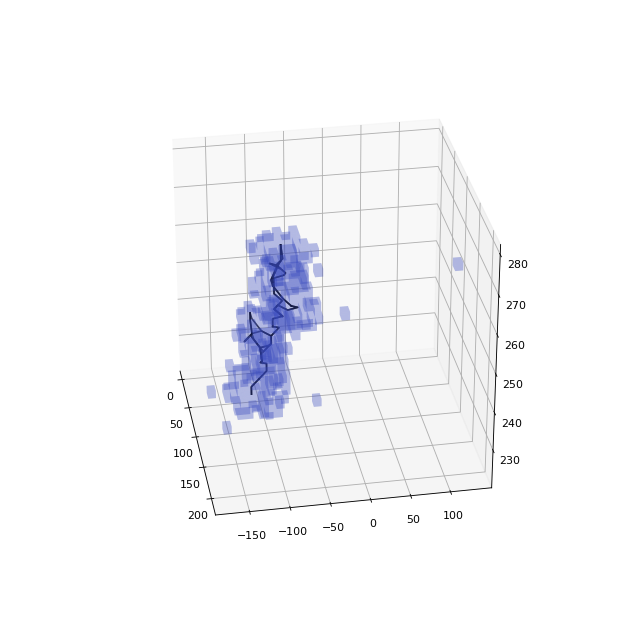

isnode {'marker': 'x', 'c': 'black', 'alpha': 0.8}
iscore {'alpha': 0.2}
ridge {'c': 'black', 'alpha': 0.8}


In [226]:
plt.figure(figsize = (8, 8))
draw(value = False, iscore = True, opts={'iscore':{'alpha':0.2}}, rotate = True)

<IPython.core.display.Javascript object>


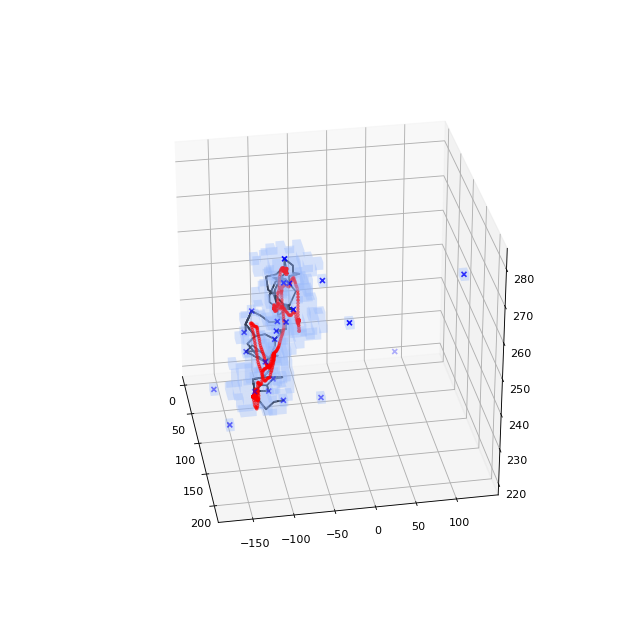

In [197]:
plt.figure(figsize = (8, 8));
#draw = pltclouds.drawer(cells, bins, df)
draw = pltclouds.drawer(cells, bins, df, 'p', plot = False)
plt.gca().scatter(xmc, ymc, zmc, c = 'red' , marker = '.', alpha = 0.5);
draw();
pltclouds.rotate()

<IPython.core.display.Javascript object>


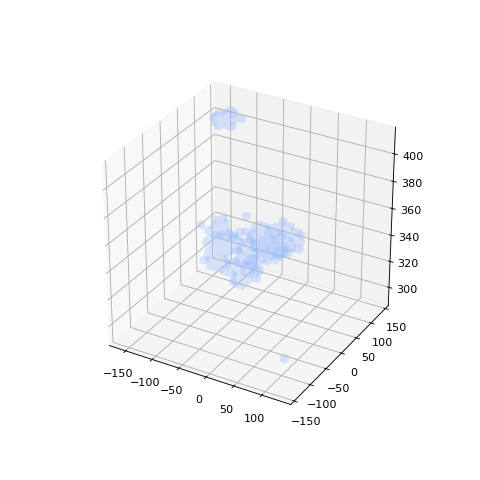

In [180]:
plt.figure(figsize = (6, 6));
draw(value = True, ispass = True, ridge = False)

In [105]:
np.sum(df.eispass)

20

In [31]:
draw(value = True)

In [ ]:
cells_select = pltclouds.cells_select

plt.figure(figsize = (10, 10))
plt.gca(projection = '3d')
evalue = df.pvalue.values
scale  = evalue

xx, yy, zz = np.meshgrid(*bins)
umask      = np.copy(mask)
filled     = np.swapaxes(umask, 0, 1).astype(bool)

norm      = colors  .Normalize(vmin=min(scale), vmax=max(scale), clip=True)
mapper    = colormap.ScalarMappable(norm=norm, cmap=colormap.coolwarm)
facecolor = mapper.to_rgba(scale)
#ax.voxels(x, y, z, filled, alpha=0.5)

plt.gca().voxels(xx, yy, zz, filled, alpha = 0.1, facecolor = facecolor);
plt.gca().scatter(*coorsmc, marker ='.', alpha = 0.2);
#plt.gca().scatter(*cells_select(cells, df.isdisper), marker = 's', alpha = 0.2);
plt.gca().scatter(*cells_select(cells, df.eisnode), marker = 'x', s = 50, alpha = 0.5);

eispass  = df.eispass.values
epath    = df.epath  .values
elink    = df.elink  .values

paths    = clouds.get_new_ridges(eispass, epath, elink)
for path in paths:
    pltclouds.draw_path(cells, path, c = 'black')

In [ ]:
cut = 0
_ana((x, z), (10.,  4.), ene, (xmc, zmc), enemc, ('x', 'z'), cut)
_ana((y, z), (10.,  4.), ene, (ymc, zmc), enemc, ('y', 'z'), cut)
_ana((x, y), (10., 10.), ene, (xmc, ymc), enemc, ('x', 'y'), cut)